In [91]:
import pandas as pd
import os
import gzip
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [92]:
sdg_path="/mnt/c/Users/Samuel/Documents/python/data/Eurostat/sdg/sdg_01/"
path="/mnt/c/Users/Samuel/Documents/python/data/Eurostat/"

In [128]:
all_sdg = [os.path.join(root, f) for root, dirs, files in list(os.walk(os.path.join(path, "sdg"))) for f in files]
tables = pd.Series(index = [p.split("/")[-1].split(".")[0] for p in all_sdg], data=all_sdg).rename("path").to_frame()

def get_index_cols(file_path):
    with gzip.open(file_path,'rt') as f:
        count = f.readline().count(",")+1
    return count
    
tables["index_cols"] = tables["path"].apply(get_index_cols)
contents = pd.read_csv(path + "table_of_contents_en.txt", sep = "\t").set_index("code").groupby(level=0).first()
tables["title"] = contents.loc[tables.index,"title"].str.strip()
tables = tables.groupby(tables.index).first()

goals = ['No poverty', 'Zero hunger', 'Health and wellbeing', 'Quality educatation',
      'Gender equality', 'Water and sanitation', 'Clean energy', 'Work and growth', 'Industry and infrastructure', 'Reducing inequality', 'Sustainable cities',
      'Production and consumption', 'Climate action', 'Ocean life', 'Land life', 'Peace and justice', 'International cooperation']
goals = pd.Series(goals, index = range(1,len(goals)+1)).to_frame('Goals')

tables = pd.concat((tables, pd.DataFrame(dict(zip(("goal_num","indic_num"), list(zip(*[x.split("_")
    for x in tables.index]))[1:])), index=tables.index).astype(int)), axis=1)

tables["goal_desc"] = tables["goal_num"].map(goals["Goals"])

In [129]:
data = {}

for table_code, table_data in tables.iterrows():
    df = pd.read_csv( table_data["path"], sep = '\t|\,', na_values=[":"," :", ": "], index_col = list(range(table_data["index_cols"])))\
        .apply(lambda c : pd.to_numeric(c.astype(str).str.strip(" bcdefinprsuz"), errors='coerce'))
    df["table"] = table_code
    df.set_index("table", append=True, inplace=True)
    df.index.names = [i.split("\\")[0] for i in  df.index.names]
    data[table_code] = df

In [130]:
# which fields have non-numeric columns?
import numpy as np
tables["nonNum"] = [np.any(pd.to_numeric(data[x].columns, errors='coerce').isnull()) for x in tables.index]

# format titles of timeseries tables as numbers and sort them
for c, t in data.items():
    if not tables.loc[c,"nonNum"]:
        t.columns = [int(y) for y in pd.to_numeric(t.columns)]
        t.sort_index(axis=1, inplace=True)
        

In [96]:
pd.set_option('display.max_colwidth',-1)
tables["title"].sample(5).to_frame()

,title
sdg_06_50,Phosphate in rivers (source: EEA)
sdg_16_30,General government total expenditure on law courts
sdg_09_50,Share of busses and trains in total passenger transport
sdg_11_60,Recycling rate of municipal waste
sdg_08_40,Long-term unemployment rate by sex


In [72]:
# print a sample from one interesting table...
interesting_tables = ['sdg_08_20']

code = "sdg_08_20"
df = data[code]
print(tables.loc[code,"title"])
df.sample(5)

Young people neither in employment nor in education and training by sex


2000  2001  2002  2003  \
sex age    typtrai    wstatus unit geo table                               
F   Y15-29 NO_FED_NFE NEMP    PC   DE  sdg_08_20  13.6  13.0  13.5  14.6   
                                   ES  sdg_08_20  20.0  19.3  19.4  18.7   
T   Y15-29 NO_FED_NFE NEMP    PC   IS  sdg_08_20  4.4   3.6   5.4   5.6    
F   Y15-29 NO_FED_NFE NEMP    PC   MK  sdg_08_20 NaN   NaN   NaN   NaN     
T   Y15-29 NO_FED_NFE NEMP    PC   SI  sdg_08_20 NaN    10.1  10.1  9.0    

                                                  2004  2005  2006  2007  \
sex age    typtrai    wstatus unit geo table                               
F   Y15-29 NO_FED_NFE NEMP    PC   DE  sdg_08_20  14.8  16.2  15.1  14.2   
                                   ES  sdg_08_20  18.0  17.3  16.0  15.8   
T   Y15-29 NO_FED_NFE NEMP    PC   IS  sdg_08_20  6.0   5.1   5.0   4.6    
F   Y15-29 NO_FED_NFE NEMP    PC   MK  sdg_08_20 NaN   NaN    49.3  41.5   
T   Y15-29 NO_FED_NFE NEMP    PC   SI  sdg_08_20  8.2   9.7   9.7   8.2    

                                                  2008  2009  2010  2011  \
sex age    typtrai    wstatus unit geo table                               
F   Y15-29 NO_FED_NFE NEMP    PC   DE  sdg_08_20  13.8  13.3  12.9  11.7   
                                   ES  sdg_08_20  16.6  19.5  19.7  20.4   
T   Y15-29 NO_FED_NFE NEMP    PC   IS  sdg_08_20  5.3   9.7   10.1  7.6    
F   Y15-29 NO_FED_NFE NEMP    PC   MK  sdg_08_20  40.8  37.2  35.1  34.8   
T   Y15-29 NO_FED_NFE NEMP    PC   SI  sdg_08_20  7.5   9.3   9.4   9.4    

                                                  2012  2013  2014  2015  \
sex age    typtrai    wstatus unit geo table                               
F   Y15-29 NO_FED_NFE NEMP    PC   DE  sdg_08_20  11.5  10.8  10.8  10.5   
                                   ES  sdg_08_20  21.6  22.1  20.9  19.7   
T   Y15-29 NO_FED_NFE NEMP    PC   IS  sdg_08_20  7.0   6.4   6.9   5.3    
F   Y15-29 NO_FED_NFE NEMP    PC   MK  sdg_08_20  34.1  34.6  36.2  35.3   
T   Y15-29 NO_FED_NFE NEMP    PC   SI  sdg_08_20  11.8  12.9  12.9  12.3   

                                                  2016  2017  
sex age    typtrai    wstatus unit geo table                  
F   Y15-29 NO_FED_NFE NEMP    PC   DE  sdg_08_20  10.9  10.5  
                                   ES  sdg_08_20  18.7  17.1  
T   Y15-29 NO_FED_NFE NEMP    PC   IS  sdg_08_20  4.6   4.1   
F   Y15-29 NO_FED_NFE NEMP    PC   MK  sdg_08_20  34.0  35.7  
T   Y15-29 NO_FED_NFE NEMP    PC   SI  sdg_08_20  10.9  9.3

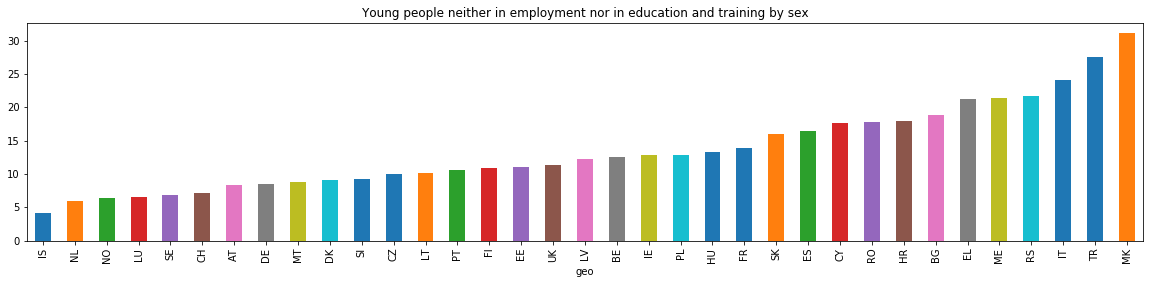

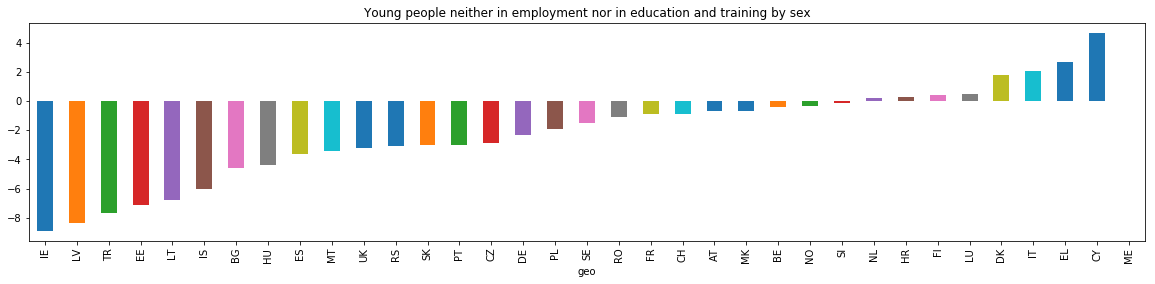

<Figure size 432x288 with 0 Axes>

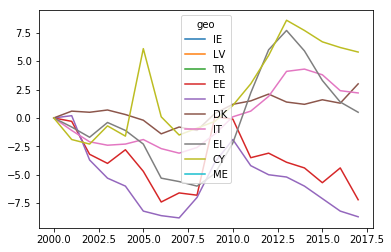

In [73]:
agg = ['EA18','EA19','EU27','EU28']
dft = df[df.index.get_level_values("sex")=="T"]
dfm = df[df.index.get_level_values("sex")=="M"]
dff = df[df.index.get_level_values("sex")=="F"]
dft = dft.set_index(dft.index.get_level_values("geo"))[~np.in1d(dft.index.get_level_values("geo"),agg)]
dfm = dfm.set_index(dfm.index.get_level_values("geo"))[~np.in1d(dfm.index.get_level_values("geo"),agg)]
dff = dff.set_index(dff.index.get_level_values("geo"))[~np.in1d(dff.index.get_level_values("geo"),agg)]

plt.figure()
dft[dft.columns[-1]].sort_values().plot(kind='bar', figsize=(20,4), title=tables.loc[code,"title"]);
plt.figure()
(dft[2017] - dft[2010]).sort_values().plot(kind='bar', figsize=(20,4), title=tables.loc[code,"title"]);

plt.figure()
best = (dft[2017] - dft[2010]).sort_values()[:5].index
worst = (dft[2017] - dft[2010]).sort_values()[-5:].index
best_worst = list(best)+list(worst)
dft.loc[best_worst].sub(dft.loc[best_worst,dft.columns[0]], axis=0).T.plot()

In [1]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
import pandas as pd
init_notebook_mode(connected=True)

In [59]:
countries = pd.read_pickle('/mnt/c/Users/Samuel/Documents/python/data/iso_country_codes.pickle')
countries["data"] = np.random.uniform(size=len(countries))

In [87]:
cpdata = countries.copy()
del cpdata["data"]
cpdata["data"] = cpdata["iso_alpha_2"].map(dict(zip(dft.index.get_level_values("geo"),dft[2017])))
cpdata= cpdata.dropna(subset=['data'])

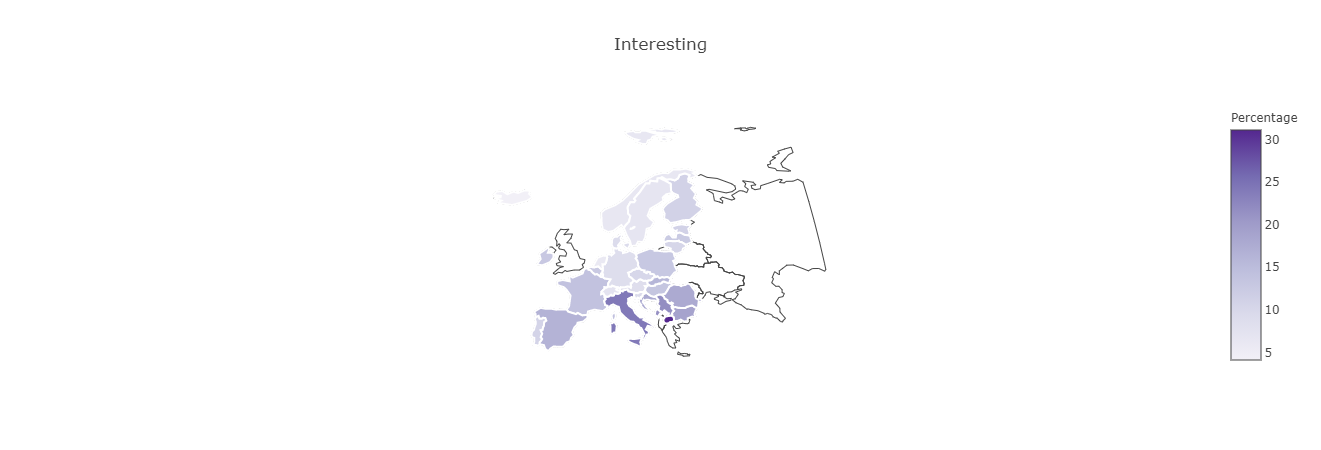

In [88]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth', colorscale = scl, autocolorscale = False, locations = cpdata['iso_alpha_3'],
        z = cpdata['data'].astype(float), locationmode = 'ISO-3', text = cpdata['name'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "Percentage")
    )]

layout = dict(height=800,
        title = 'Interesting',
        geo = dict(scope='europe', projection=dict( type='natural earth' ), showlakes = True,lakecolor = 'rgb(255, 255, 255)',),
    )

fig = dict(data=data, layout=layout)
url = py.iplot(fig)

In [47]:
countries = pd.read_pickle('/mnt/c/Users/Samuel/Documents/python/data/iso_country_codes.pickle')